# Install & Import python-twitter package

In [ ]:
#!pip install python-twitter

In [ ]:
#pip install boto3

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..', 'code'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import config      #python file with API credentials for authentication

import twitter
import requests
import matplotlib.pyplot as plt
import json
import boto3

# Search for Tweets with twitter-python module

In [3]:
api = twitter.Api(consumer_key=config.twitter_consumer_key,
                      consumer_secret=config.twitter_consumer_secret,
                      access_token_key=config.twitter_access_token_key,
                      access_token_secret=config.twitter_access_token_secret)

In [4]:
req0 = api.GetSearch(raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=3")
req0

[Status(ID=1488651413357875200, ScreenName=kjo64013719, Created=Tue Feb 01 23:12:09 +0000 2022, Text='RT @kujiraninnniku: Twitterをやる理由。日本人の日本人による日本人のための政治を実現するために外国人参政権禁止、移民禁止、外国人生活保護は難民以外禁止の上、反日特別永住権者の帰還。私は日本人の元官僚だから日本人を豊かにするためだけに税金を使わせて欲しい。'),
 Status(ID=1488651413278371841, ScreenName=Pedro_mfontella, Created=Tue Feb 01 23:12:09 +0000 2022, Text='RT @vini_vecchi: “vc tem twitter ? qual que é ?”\n\n-tava eu e o jorginho…'),
 Status(ID=1488651413144338432, ScreenName=CoffeeholicSgg, Created=Tue Feb 01 23:12:09 +0000 2022, Text="RT @MusicArtistsPH: K-Pop Superstar @BTS_twt is back at #1 with their song 'Butter' while P-Pop Sensation @SB19Official 'Bazinga' ranked #2…")]

In [5]:
req1 = api.GetSearch(raw_query="q=twitter")
req1

[Status(ID=1488651528198303745, ScreenName=Ym2dE2vDcmR8LuH, Created=Tue Feb 01 23:12:36 +0000 2022, Text='RT @46Jyx: 〜Twitterを始めて明日で60日目〜\n\nSNSを自分が始めて思った事\n\n[自分が不幸なんて思わないで欲しい]\n\n長くなるけど、少しでも共感してくれたりしたらRTやいいねだったり欲しいな\n\n神の友達とか言ってるからこそ、一人でも多く助けたい\n\n✳︎字が小…'),
 Status(ID=1488651527724351488, ScreenName=Reochin2525, Created=Tue Feb 01 23:12:36 +0000 2022, Text='RT @onigiri_ume88: 毎回ツイート考えるの大変。\nじゃないと【抽選ったー】取得ちゃんとしないんだもん。\n\n□#PayPay 500×1\n\n□2月2日 20:00締め切り\n\n□抽選ったーで抽選【有料版】\n\n□複垢やTwitter規約に違反する事\n   やらないでね…'),
 Status(ID=1488651527413633024, ScreenName=hoonie_128, Created=Tue Feb 01 23:12:36 +0000 2022, Text='RT @billboardcharts: The #HotTrendingSongs Powered by Twitter top 10 (chart dated Feb. 5, 2022)'),
 Status(ID=1488651527145152513, ScreenName=jaemacityxX, Created=Tue Feb 01 23:12:36 +0000 2022, Text='RT @behype_nft: We are proud to present our 200K Members Teaser. 👀\n\nFor this special occasion, we offer 1 NFT + 25 WHITELIST. 🎁\n\nTo partici…'),
 Status(ID=1488651527015354371, Sc

# Count Tweets about Tesla (recent: last 7 days)

In [8]:
def count_tweets_recent():
    
    url_base = "https://api.twitter.com"
    url_count_recent = "/2/tweets/counts/recent"
    end_point = url_base + url_count_recent

    # identification for this endpoint is Oauth2.0, it requieres a bearer token
    BEARER_TOKEN = config.twitter_bearer_token

    headers = {
        'Authorization': 'Bearer {}'.format(BEARER_TOKEN),
    }

    params = (
        ('query', 'TESLA'),
        ('granularity', 'hour'),
    )

    response = requests.get(end_point, headers=headers, params=params)
    return response.json()

count_tweets_recent()

{'data': [{'end': '2022-01-26T00:00:00.000Z',
   'start': '2022-01-25T23:13:56.000Z',
   'tweet_count': 5084},
  {'end': '2022-01-26T01:00:00.000Z',
   'start': '2022-01-26T00:00:00.000Z',
   'tweet_count': 5707},
  {'end': '2022-01-26T02:00:00.000Z',
   'start': '2022-01-26T01:00:00.000Z',
   'tweet_count': 5081},
  {'end': '2022-01-26T03:00:00.000Z',
   'start': '2022-01-26T02:00:00.000Z',
   'tweet_count': 3839},
  {'end': '2022-01-26T04:00:00.000Z',
   'start': '2022-01-26T03:00:00.000Z',
   'tweet_count': 3168},
  {'end': '2022-01-26T05:00:00.000Z',
   'start': '2022-01-26T04:00:00.000Z',
   'tweet_count': 3097},
  {'end': '2022-01-26T06:00:00.000Z',
   'start': '2022-01-26T05:00:00.000Z',
   'tweet_count': 2615},
  {'end': '2022-01-26T07:00:00.000Z',
   'start': '2022-01-26T06:00:00.000Z',
   'tweet_count': 2675},
  {'end': '2022-01-26T08:00:00.000Z',
   'start': '2022-01-26T07:00:00.000Z',
   'tweet_count': 2967},
  {'end': '2022-01-26T09:00:00.000Z',
   'start': '2022-01-26T08:

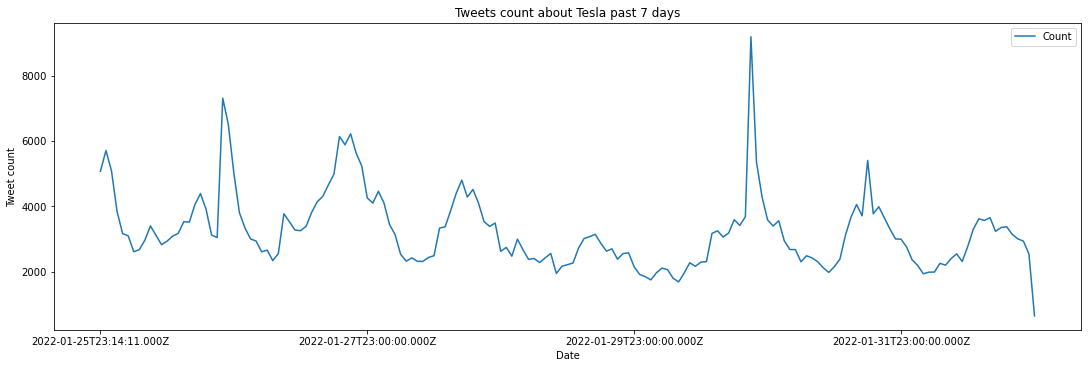

In [10]:
def plot_tweet_count(tweet_count_json):
    #create one list of date and one list of tweet counts
    list_date = []
    list_count = []
    for r in tweet_count_json['data']:
        list_date.append(r['start'])
        list_count.append(r['tweet_count'])
    
    #create the plot
    twitter_tesla_trends, axs = plt.subplots(1, 1, figsize=(15, 5), layout='constrained')

    axs.plot(list_date, list_count, label = "Count")

    axs.set_xlabel("Date")
    axs.set_ylabel("Tweet count")
    axs.set_title("Tweets count about Tesla past 7 days")
    axs.set_xticks(list_date[::48])    #show every 2nd row for more clarity on x axis
    axs.legend()

plot_tweet_count(count_tweets_recent())

# Count Tweets all (Full Archive)

In [11]:
def count_tweet_full_archive():
    
    url_base = "https://api.twitter.com"
    url_count_all = "/2/tweets/counts/all"
    end_point = url_base + url_count_all

    # identification for this endpoint is Oauth2.0, it requieres a bearer token
    BEARER_TOKEN = config.twitter_bearer_token

    headers = {
        'Authorization': 'Bearer {}'.format(BEARER_TOKEN),
    }

    params = (
        ('query', 'TESLA'),
        ('granularity', 'day'),
    )

    response = requests.get(end_point, headers=headers, params=params)
    return response.json()

count_tweet_full_archive()

{'client_id': '23126272',
 'detail': 'When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.',
 'registration_url': 'https://developer.twitter.com/en/docs/projects/overview',
 'title': 'Client Forbidden',
 'required_enrollment': 'Standard Basic',
 'reason': 'client-not-enrolled',
 'type': 'https://api.twitter.com/2/problems/client-forbidden'}

### Count Tweets Full Archive endpoint is for Academic Research students (Masters & Doctorates) and Premium access only, I do not have the account rights to retrieve Full Archive data with an Elevated Account.

# Stream Tweets - Sample

In [14]:
def stream_connect(bearer_token):
    
    headers = {
        'Authorization': 'Bearer {}'.format(config.twitter_bearer_token),
    }
    
    response = requests.get('https://api.twitter.com/2/tweets/sample/stream', headers=headers, stream=True)
    
    #response is multiple lines
    for response_line in response.iter_lines():
        if response_line:
            tweet = json.loads(response_line)
            text = tweet['data']['text']
            print(text)

In [15]:
def stream():
    
    BEARER_TOKEN = config.twitter_bearer_token
    timeout = 0
    while True:
        stream_connect(BEARER_TOKEN)
        sleep(2**timeout)
        timeout += 1
        
stream()

@manit__patel @stocktraderluke @KSTiLLS @AdamSchefter Yeah…. It’s random
se eu falar uma coisa acho que vão me cancelar mas pqp kkkkkk tô entalada
何が難しいってもちろんテクニック的な部分もそうだけど譜読みが遅すぎて、これラ？ド？ミ？てなるのが一番の課題 笑笑
RT @GolSportsEc: El primer resultado de la jornada 16 de las #EliminatoriasQatar2022 es de #Bolivia 2-3 #Chile.

Con esto los chilenos se u…
RT @ewarren: It’s popular—and it’s the right thing to do. #CancelStudentDebt
https://t.co/BjkG5ArSRu
色落ち完璧だな😺👏🏻 https://t.co/UxCWzMpmlF
行動しない事自体が失敗なのですよね^^ よく考えて行動していくと、どんどん成功して行くみたいです^^ 行動してうまくいかなかった事を変えていくと、成功へと近づくのですから…行動しない事自体が失敗なのだと思うのです☆
続きは→https://t.co/t9YZjlIl8Q
Ne kadar hayırlı bi arkadasım https://t.co/lxfwuu8x1v
RT @niccoyat: Here come the Wattpad books about Rihanna’s daughter x Nicki Minaj’s son. Bestfriends to lovers trying to figure out living u…
faço de tudo pra não assistir essa aula meu deus estou arrumando o quarto enquanto a aula rola kkkkkkkkk
RT @okiecorri: they’re not “red flags” they’re “fun facts about me”
中世には、『理性より神学』が重

RT @MNHZ0NE: https://t.co/eG3IN8IseX
Karma don’t be doing it quick enough for me.
@rmcsosuh @reclaiminmyhead Lmao
RT @__dtd: im quick to say "ill pay extra" to get something rushed or to get squeezed in. i don't play those games 😭
@DoggoXIV @GreenBean_NSFW always a pleasure, thanks for working with me again! :D
Brie really my dawg 🤣 only a select few know and understand me and she one of em @brianah_elise 🤝
My interaction with Poles, that no one else sees, are similar to like Japanese people bowing to each other in a highly regimented way. Eye contact, smiling, and heartfelt greetings.
RT @nreyes100: Se acabó el autoabastecimiento a Iberdrola en Monterrey

El autoabastecimiento ocasionó un mercado paralelo en el que privad…
Posted a new photo: https://t.co/mO9CglwSye https://t.co/gyo18twufk
@over_mind69 انت عاملها فوتوشوب يا مصطفى اكيد ... اكيد جد فوتوشوب
RT @Salamandrea_: Viñeta de @/gemma_granados en instagram que lo dice todo https://t.co/iJngXM8Pyb
RT @BTSVotingTroop: I vote #BTSAR

RT @wildmageNSFW: #nsfw cw monsterfucking, dubcon
nomu/deku belly bulge for kinktober 👀 it's one from last year i didn't get to but here it…
@naachite en plan Nacho Grillo 🦗 tenía sentido
RT @newsmax: TRUMP TONIGHT: @SchmittNYC goes one-on-one with '45' from Mar-A-Lago at 10:00PM ET. #RobSchmittTonight https://t.co/VlT7z8v2lm…
RT @s_sasamatsu: 母が、幼少期の、Nゲージ鉄道模型を欲しがった私に「あれは大人のおもちゃだから」と誤魔化したせいで、「大人のおもちゃ」という黒い看板を掲げた怪しい店に突入したがる鉄道少年が誕生したという笑い話は永久に語り継ぎたい
RT @RepThomasMassie: “Fact-checker” is just a euphemism for “corporate mouthpiece”and “leftist propagandist.”
#LLGMA💔💔 https://t.co/K7dStNWaVA
RT @SOPEK0SMOS: all of this because they want to maintain some "underdog" image?? man they're crazy crazy
RT @osmtkiuti: https://t.co/B4jfwHYUgO
@betool2_ يارل
RT @TwisterMakiya: カップ麺の出来上がりを待っていたら、3日前一緒にいた同僚がコロナ陽性になったと連絡が来た。身を案じる返事をしつつ麺をすする、妙に味が薄く感じた。初期症状などを検索しながら味の薄い麺をすすり続ける。不安だ。麺の中から液体スープの袋が出てきた。…
Kenapa kita tidak bs maksa dan keukeh kuasai langit kita sendiri?? Ini demi keamanan dan kedaulatan. Dlu

RT @vellutobIu: Hozier premio Tamberi
OFICIALMENTE O ANO DO TIGRE COMEÇOU

Debut dia 13/02 às 16h

https://t.co/wEwCSxGb39 https://t.co/Y8nCyMlXLt
This shit is crazy, não ter ninguém com quem falar é lixado, I can’t take it anymore
RT @Saywhat43938305: No fundamentals huh?  @CEOAdam has made this possible through his exceptional leadership. I support our CEO!  LFG✊🏽 #C…
Zoar was the smallest community just South of Nain, now abandoned. There are still a few old houses there, it was also one of the stations for Hudson Bay Company.
In the late 1800's several families from there went to take part in Seattle World Fair. https://t.co/rRYRDYmjjz
RT @arab_coding: تعلم اللغات قد يفتح لك باب رزق جديد ..

تعلم اللغة الاسبانية من هذه المواقع 👇

1_موقع Amauta 
https://t.co/yt1a2g6Vvp

2_…
RT @Obacruze: Shank Agba. Lit Gang shiii🧘🏾‍♀️👿 https://t.co/Lzfq2GTe14
かまってくれるなら幸せだけど？
会う話がしたいのだ。
濃いの出してね？
MSHSL: North Branch (75) at Zimmerman (68) - FINAL https://t.co/eNKYQ7Fqy0
RT @TheReesesGirl: أنا مصري وأ

KeyboardInterrupt: 

# Stream Tweets - TESLA Filtered

## 1) Specify a filter

### The context operator

###### Much like in my Google Trend analysis, there exists in Twitter a classification of topics that can be accessed through a context operator.
###### Instead of looking specifically for ('Tesla' OR 'Tesla model 3' OR 'Tesla stock') you can use the correct context operator that refers to the Tesla entity.

#### Get a Tweet about Tesla

In [16]:
#I found this tweet about Tesla that we are going to use to retrieve the context operator of Tesla
{
"id": "1488408307597414402",
"text": "RT @PPathole: Tesla Falcon wing doors are unreal 🤯 @elonmusk https://t.co/UCsIOchig9"
}

{'id': '1488408307597414402',
 'text': 'RT @PPathole: Tesla Falcon wing doors are unreal 🤯 @elonmusk https://t.co/UCsIOchig9'}

#### Lookup the Tweet's context operator

In [18]:
#Let's get that tweet object

headers = {
        'Authorization': 'Bearer {}'.format(config.twitter_bearer_token),
    }

params = (
    ('tweet.fields', 'context_annotations'),
)
random_tweet_tesla = requests.get('https://api.twitter.com/2/tweets/1488408307597414402', headers=headers, params = params)
random_tweet_tesla.json()

{'data': {'context_annotations': [{'domain': {'id': '10',
     'name': 'Person',
     'description': 'Named people in the world like Nelson Mandela'},
    'entity': {'id': '808713037230157824',
     'name': 'Elon Musk',
     'description': 'Elon Musk'}},
   {'domain': {'id': '45',
     'name': 'Brand Vertical',
     'description': 'Top level entities that describe a Brands industry'},
    'entity': {'id': '781972125171060736', 'name': 'Auto'}},
   {'domain': {'id': '46',
     'name': 'Brand Category',
     'description': 'Categories within Brand Verticals that narrow down the scope of Brands'},
    'entity': {'id': '781972125179518977', 'name': 'Auto Manufacturer'}},
   {'domain': {'id': '47',
     'name': 'Brand',
     'description': 'Brands and Companies'},
    'entity': {'id': '10044199219', 'name': 'Tesla Motors'}},
   {'domain': {'id': '65',
     'name': 'Interests and Hobbies Vertical',
     'description': 'Top level interests and hobbies groupings, like Food or Travel'},
    'en

#### We can see all sorts of 'domains' and 'entities' because the tweet also deals with Elon Musk (entity: 808713037230157824)
#### Let's choose the 'domain' and 'entity' that refer to Tesla the car manufacturer : Tesla Motors

In [21]:
entity_id = '10044199219'     # Tesla Motors
domain_id = '47'              # Brand - Brands and Companies

#### Build the filter

In [22]:
def create_filter():
    payload = {
        'add':[
            {
                'value': 'context:'+ str(domain_id) + '.' + str(entity_id) + ' -is:retweet', 'tag':'Tesla'
            }
        ]
    }
    response = requests.post('https://api.twitter.com/2/tweets/search/stream/rules', headers=headers, json=payload)
    
    if response.status_code == 201:
        print('Response: {}'.format(response.text))
    else:
        print('Cannot create filter (HTTP {}): {}'.format(response.status_code, response.text))

In [23]:
create_filter()

Response: {"meta":{"sent":"2022-02-01T23:23:24.016Z","summary":{"created":0,"not_created":1,"valid":0,"invalid":1}},"errors":[{"value":"context:47.10044199219 -is:retweet","id":"1488648200739500033","title":"DuplicateRule","type":"https://api.twitter.com/2/problems/duplicate-rules"}]}


#### Create the Stream

In [24]:
def stream_connect(bearer_token):
    
    response = requests.get('https://api.twitter.com/2/tweets/search/stream', headers=headers, stream=True)
    
    #response is multiple lines
    for response_line in response.iter_lines():
        if response_line:
            tweet = json.loads(response_line)
            tweet_id = tweet['data']['id']
            text = tweet['data']['text']
            print(tweet_id, text[0:50])

In [25]:
def stream():
    
    BEARER_TOKEN = config.twitter_bearer_token
    timeout = 0
    while True:
        stream_connect(BEARER_TOKEN)
        sleep(2**timeout)
        timeout += 1
        
stream()

1488654320895762433 @tesla_shibainu @SolanaTrending @Tesla @elonmusk @
1488654324162973697 RT @cooperlund: Probably worth mentioning that thi
1488654332660629504 @DirtyTesla @Tesla @elonmusk Yeah, no headline wil
1488654338084024320 RT @truth_tesla: In other news, last week Apple re
1488654336993472518 0x5415ec1f4c2517c2dc24085f3c6e58030dddd84d https:/
1488654345763762178 RT @NatBullard: @grossdm @KeithNaughton @Ford @Tes
1488654349123219457 RT @RussellFosterTX: How can we believe ERCOT can 
1488654348309647361 @garyblack00 I believe Q3 likely Gary once two fac
1488654349177958401 RT @GerardLos: Me confirmó quien tiene el contrato
1488654357088374786 RT @shibaRicher: I'm going to sending 16,000,000,0
1488654359189544960 Tesla Model X Windshield Wiper Blade (1 pair) - ht
1488654369629245442 RT @drobby: Tesla dodged the $41.2 million penalty
1488654372670115841 RT @G6Anon: Tesla Free Energy Anyone? https://t.co
1488654368798826498 Tesla, making life threatening real lif video game
148865

KeyboardInterrupt: 

### Sentiment Analysis with AWS Comprehend using Boto3

In [26]:
def stream_connect(bearer_token):
    
    #use AWS Comprehend API to retrieve a sentiment analysis of our Tesla tweets
    comprehend = boto3.client(service_name = 'comprehend', aws_access_key_id = config.aws_access_key_id, aws_secret_access_key = config.aws_secret_access_key, region_name = 'us-east-1')
    
    response = requests.get('https://api.twitter.com/2/tweets/search/stream', headers=headers, stream=True)
    
    #response is multiple lines
    for response_line in response.iter_lines():
        if response_line:
            tweet = json.loads(response_line)
            tweet_id = tweet['data']['id']
            text = tweet['data']['text']
            tweet_sentiment = comprehend.detect_sentiment(Text = text, LanguageCode = 'en')
            sentiment = tweet_sentiment['Sentiment']
            sentiment_score = tweet_sentiment['SentimentScore']
            for score in sentiment_score:
                sentiment_score[score] = round(sentiment_score[score], 3)
                
            print('__________________________')
            print('id: ', tweet_id)
            print('Sentiment: ', sentiment)
            print('Tweet: ', text[0:100]) 
            print(sentiment_score)
            print()
            print()

In [27]:
def stream():
    
    BEARER_TOKEN = config.twitter_bearer_token
    timeout = 0
    while True:
        stream_connect(BEARER_TOKEN)
        sleep(2**timeout)
        timeout += 1
        
stream()

__________________________
id:  1488654625968300037
Sentiment:  NEGATIVE
Tweet:  RT @cooperlund: Probably worth mentioning that this wasn’t because of a bug, it was explicitly desig
{'Positive': 0.009, 'Negative': 0.622, 'Neutral': 0.366, 'Mixed': 0.003}


__________________________
id:  1488654637020454912
Sentiment:  NEUTRAL
Tweet:  @rch3000 @barronsonline @WholeMarsBlog @Tesla Tell him to hurry up. "Someday" is too far away.
{'Positive': 0.007, 'Negative': 0.4, 'Neutral': 0.593, 'Mixed': 0.0}


__________________________
id:  1488654644280987649
Sentiment:  POSITIVE
Tweet:  RT @garyblack00: Media loves to create drama.

DJ: “Tesla will recall nearly 54,000 U.S. cars over s
{'Positive': 0.543, 'Negative': 0.028, 'Neutral': 0.428, 'Mixed': 0.001}


__________________________
id:  1488654646075969540
Sentiment:  NEUTRAL
Tweet:  I think I’ve seen this film before… https://t.co/WKJLcy4p8u
{'Positive': 0.005, 'Negative': 0.0, 'Neutral': 0.995, 'Mixed': 0.0}


__________________________
id

KeyboardInterrupt: 